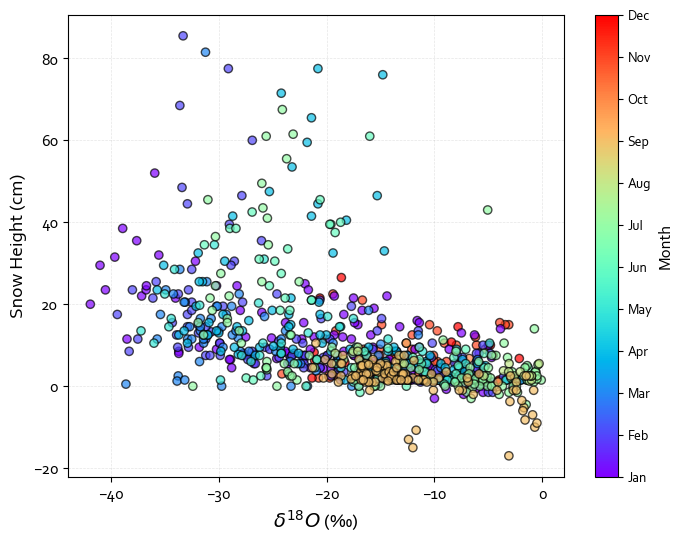

In [12]:
#####Snow height vs. d18O#################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\CiASOM_SLF_Corrected.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist
required_columns = {"d18O", "Mean_Depth", "Date"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from date
df['Month'] = df['Date'].dt.month

# Define colormap
num_months = 12
colors = cm.rainbow(np.linspace(0, 1, num_months))
colormap = {month: colors[i] for i, month in enumerate(range(1, 13))}

# Scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(df["d18O"], df["Mean_Depth"], c=df["Month"].map(colormap), alpha=0.7, edgecolors='k')
plt.xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
plt.ylabel("Snow Height (cm)", fontname='Corbel', fontsize=14)

# Set font properties for tick labels
plt.xticks(fontname='Corbel', fontsize=12)
plt.yticks(fontname='Corbel', fontsize=12)

# Add grid with specific style
ax = plt.gca()
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
plt.grid(True)

# Create a colorbar linked to the current axes
ax = plt.gca()
norm = mcolors.Normalize(vmin=1, vmax=12)
mappable = cm.ScalarMappable(norm=norm, cmap='rainbow')
mappable.set_array([])  # This is often necessary to associate the mappable with the colorbar
cbar = plt.colorbar(mappable, ax=ax, ticks=range(1, 13))
cbar.set_label('Month', fontsize=12, fontname='Corbel')
cbar.ax.set_yticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontname='Corbel', fontsize=10)

plt.show()

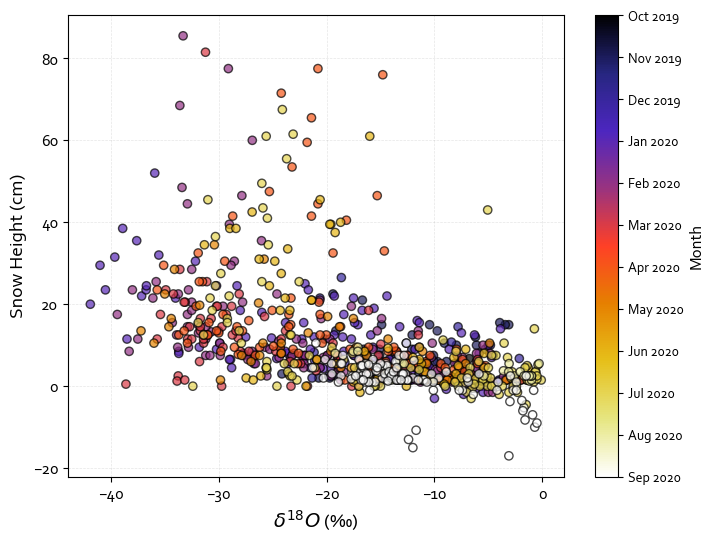

In [20]:
#####Snow height vs. d18O#################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\CiASOM_SLF_Corrected.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist
required_columns = {"d18O", "Mean_Depth", "Date"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Create a function to map month number to our custom index:
# For our period Oct 2019 to Sep 2020:
# Oct (10) -> 0, Nov (11) -> 1, Dec (12) -> 2,
# Jan (1)  -> 3,  Feb (2) -> 4, ..., Sep (9) -> 11.
def month_to_index(month):
    return month - 10 if month >= 10 else month + 2

# Apply the mapping to create a new column for color mapping
df['month_index'] = df['Month'].apply(month_to_index)

# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Create scatter plot using the month index and the 'CMRmap' colormap
sc = plt.scatter(df["d18O"], df["Mean_Depth"], 
                 c=df["month_index"], cmap='CMRmap', 
                 alpha=0.7, edgecolors='k')

plt.xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
plt.ylabel("Snow Height (cm)", fontname='Corbel', fontsize=14)

# Set font properties for tick labels
plt.xticks(fontname='Corbel', fontsize=12)
plt.yticks(fontname='Corbel', fontsize=12)

# Add grid with specific style
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a ScalarMappable and colorbar that matches our custom ordering
norm = mcolors.Normalize(vmin=0, vmax=11)
mappable = cm.ScalarMappable(norm=norm, cmap='CMRmap')
mappable.set_array([])  # Associate the mappable with the colorbar

# Create colorbar with ticks at each integer from 0 to 11
cbar = plt.colorbar(mappable, ax=ax, ticks=np.arange(0, 12))
tick_labels = ["Oct 2019", "Nov 2019", "Dec 2019", 
               "Jan 2020", "Feb 2020", "Mar 2020", 
               "Apr 2020", "May 2020", "Jun 2020", 
               "Jul 2020", "Aug 2020", "Sep 2020"]
cbar.ax.set_yticklabels(tick_labels, fontname='Corbel', fontsize=10)
cbar.set_label('Month', fontsize=12, fontname='Corbel')

# Invert the y-axis of the colorbar so it runs from top (Oct 2019) to bottom (Sep 2020)
cbar.ax.invert_yaxis()

save_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Figures\New figures\Supp_Fig_SHvsd18O.jpg"
plt.savefig(save_path, dpi=600, format='jpeg', bbox_inches='tight')

plt.show()


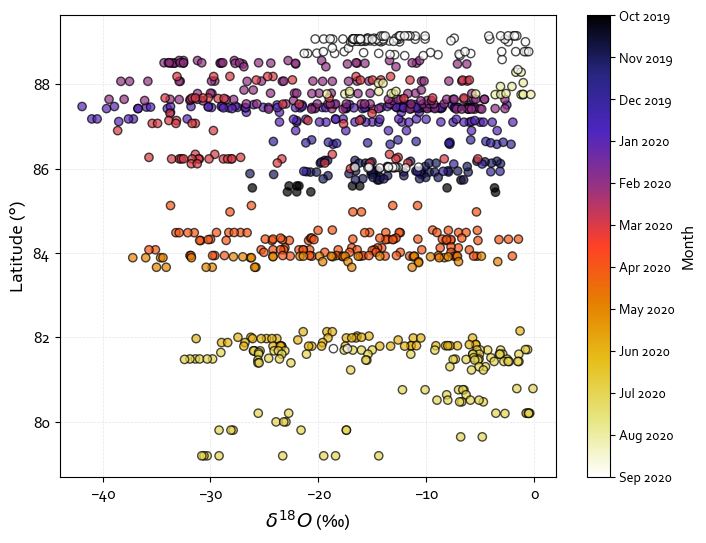

In [21]:
#####Latitude vs. d18O#################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\CiASOM_SLF_Corrected.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist
required_columns = {"d18O", "Lat", "Date"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Create a function to map month number to our custom index:
# For our period Oct 2019 to Sep 2020:
# Oct (10) -> 0, Nov (11) -> 1, Dec (12) -> 2,
# Jan (1)  -> 3,  Feb (2) -> 4, ..., Sep (9) -> 11.
def month_to_index(month):
    return month - 10 if month >= 10 else month + 2

# Apply the mapping to create a new column for color mapping
df['month_index'] = df['Month'].apply(month_to_index)

# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Create scatter plot using the month index and the 'CMRmap' colormap
sc = plt.scatter(df["d18O"], df["Lat"], 
                 c=df["month_index"], cmap='CMRmap', 
                 alpha=0.7, edgecolors='k')

plt.xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
plt.ylabel("Latitude (°)", fontname='Corbel', fontsize=14)

# Set font properties for tick labels
plt.xticks(fontname='Corbel', fontsize=12)
plt.yticks(fontname='Corbel', fontsize=12)

# Add grid with specific style
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a ScalarMappable and colorbar that matches our custom ordering
norm = mcolors.Normalize(vmin=0, vmax=11)
mappable = cm.ScalarMappable(norm=norm, cmap='CMRmap')
mappable.set_array([])  # Associate the mappable with the colorbar

# Create colorbar with ticks at each integer from 0 to 11
cbar = plt.colorbar(mappable, ax=ax, ticks=np.arange(0, 12))
tick_labels = ["Oct 2019", "Nov 2019", "Dec 2019", 
               "Jan 2020", "Feb 2020", "Mar 2020", 
               "Apr 2020", "May 2020", "Jun 2020", 
               "Jul 2020", "Aug 2020", "Sep 2020"]
cbar.ax.set_yticklabels(tick_labels, fontname='Corbel', fontsize=10)
cbar.set_label('Month', fontsize=12, fontname='Corbel')

# Invert the y-axis of the colorbar so it runs from top (Oct 2019) to bottom (Sep 2020)
cbar.ax.invert_yaxis()

save_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Figures\New figures\Supp_Fig_Latvsd18O.jpg"
plt.savefig(save_path, dpi=600, format='jpeg', bbox_inches='tight')

plt.show()


C:\Users\mardakan\AppData\Local\Temp\ipykernel_4632\2995008311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


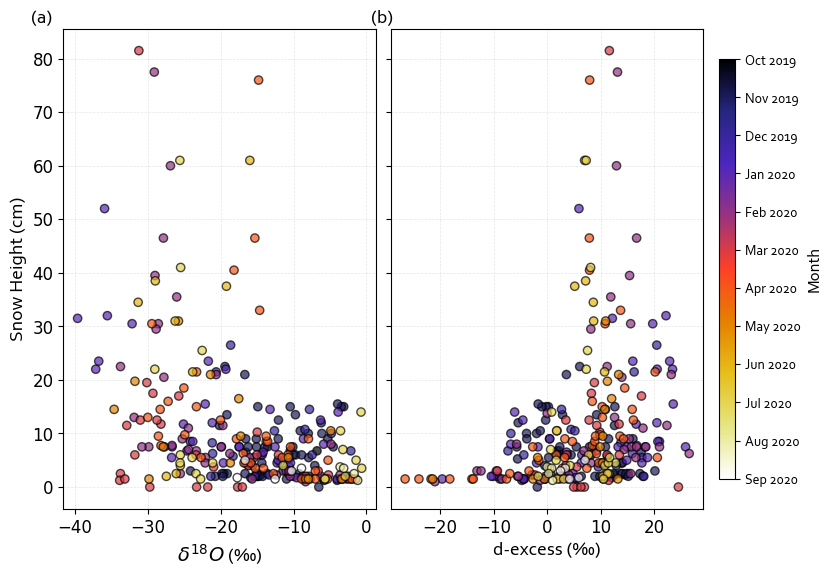

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

##### Snow height vs. d18O & d_excess #################

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\CiASOM.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist (add 'd_excess' if needed)
required_columns = {"d18O", "Mean_Depth", "Date", "d_excess"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Map month number to our custom index:
# For period Oct 2019 to Sep 2020:
# Oct (10) -> 0, Nov (11) -> 1, Dec (12) -> 2,
# Jan (1)  -> 3,  Feb (2) -> 4, ..., Sep (9) -> 11.
def month_to_index(month):
    return month - 10 if month >= 10 else month + 2

# Apply the mapping to create a new column for color mapping
df['month_index'] = df['Month'].apply(month_to_index)

# Set up the main figure and axis (for d18O vs. snow height)
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for d18O
sc1 = ax.scatter(df["d18O"], df["Mean_Depth"], 
                 c=df["month_index"], cmap='CMRmap', 
                 alpha=0.7, edgecolors='k')

# Set labels and tick properties for the main axis
ax.set_xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
ax.set_ylabel("Snow Height (cm)", fontname='Corbel', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a new axis on the right that shares the y-axis for the d_excess scatter
divider = make_axes_locatable(ax)
ax_right = divider.append_axes("right", size="100%", pad=0.15, sharey=ax)

# Scatter plot for d_excess on the new axis
sc2 = ax_right.scatter(df["d_excess"], df["Mean_Depth"], 
                       c=df["month_index"], cmap='CMRmap', 
                       alpha=0.7, edgecolors='k')

# Set the x-axis label for the right panel
ax_right.set_xlabel("d-excess (‰)", fontname='Corbel', fontsize=14)
ax_right.tick_params(axis='both', labelsize=12)
# Hide duplicate y tick labels on the right panel
plt.setp(ax_right.get_yticklabels(), visible=False)
ax_right.grid(axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a common colorbar for both scatter plots, placed on the far right
norm = mcolors.Normalize(vmin=0, vmax=11)
mappable = cm.ScalarMappable(norm=norm, cmap='CMRmap')
mappable.set_array([])

# Define a new axes for the colorbar (format: [left, bottom, width, height])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=np.arange(0, 12))
tick_labels = ["Oct 2019", "Nov 2019", "Dec 2019", 
               "Jan 2020", "Feb 2020", "Mar 2020", 
               "Apr 2020", "May 2020", "Jun 2020", 
               "Jul 2020", "Aug 2020", "Sep 2020"]
cbar.ax.set_yticklabels(tick_labels, fontname='Corbel', fontsize=10)
cbar.set_label('Month', fontsize=12, fontname='Corbel')
cbar.ax.invert_yaxis()  # so that Oct 2019 is at the top

# Add labels "a)" and "b)" next to the subplots
fig.text(0.06, 0.91, "(a)", fontdict={'fontname': 'Corbel', 'fontsize': 14}, transform=fig.transFigure)
fig.text(0.485, 0.91, "(b)", fontdict={'fontname': 'Corbel', 'fontsize': 14}, transform=fig.transFigure)

# Adjust layout and save the figure
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
save_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\Supp_Fig_SHvsd18Odex.jpg"
plt.savefig(save_path, dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


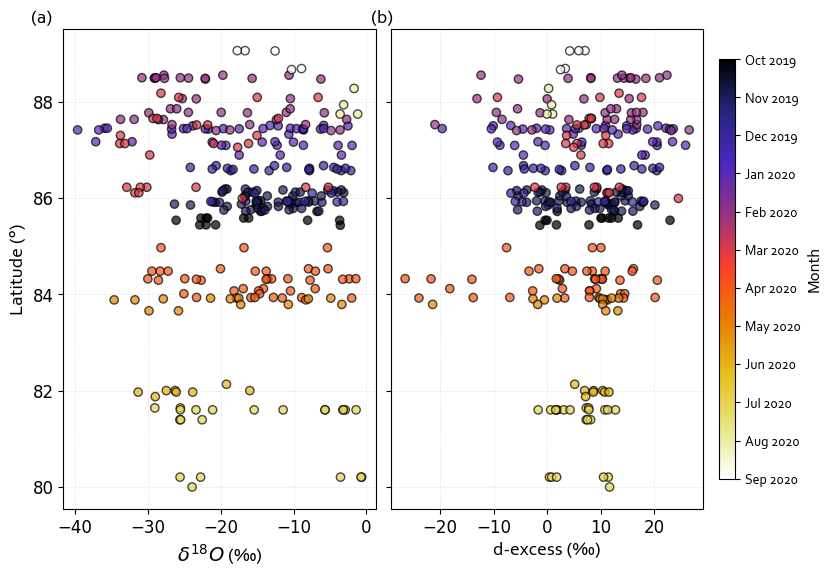

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

##### Latitude vs. d18O & d_excess #################

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\CiASOM.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist (add 'd_excess' if needed)
required_columns = {"d18O", "Lat", "Date", "d_excess"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Map month number to our custom index:
# For period Oct 2019 to Sep 2020:
# Oct (10) -> 0, Nov (11) -> 1, Dec (12) -> 2,
# Jan (1)  -> 3,  Feb (2) -> 4, ..., Sep (9) -> 11.
def month_to_index(month):
    return month - 10 if month >= 10 else month + 2

# Apply the mapping to create a new column for color mapping
df['month_index'] = df['Month'].apply(month_to_index)

# Set up the main figure and axis (for d18O vs. snow height)
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for d18O
sc1 = ax.scatter(df["d18O"], df["Lat"], 
                 c=df["month_index"], cmap='CMRmap', 
                 alpha=0.7, edgecolors='k')

# Set labels and tick properties for the main axis
ax.set_xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
ax.set_ylabel("Latitude (°)", fontname='Corbel', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a new axis on the right that shares the y-axis for the d_excess scatter
divider = make_axes_locatable(ax)
ax_right = divider.append_axes("right", size="100%", pad=0.15, sharey=ax)

# Scatter plot for d_excess on the new axis
sc2 = ax_right.scatter(df["d_excess"], df["Lat"], 
                       c=df["month_index"], cmap='CMRmap', 
                       alpha=0.7, edgecolors='k')

# Set the x-axis label for the right panel
ax_right.set_xlabel("d-excess (‰)", fontname='Corbel', fontsize=14)
ax_right.tick_params(axis='both', labelsize=12)
# Hide duplicate y tick labels on the right panel
plt.setp(ax_right.get_yticklabels(), visible=False)
ax_right.grid(axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Create a common colorbar for both scatter plots, placed on the far right
norm = mcolors.Normalize(vmin=0, vmax=11)
mappable = cm.ScalarMappable(norm=norm, cmap='CMRmap')
mappable.set_array([])

# Define a new axes for the colorbar (format: [left, bottom, width, height])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=np.arange(0, 12))
tick_labels = ["Oct 2019", "Nov 2019", "Dec 2019", 
               "Jan 2020", "Feb 2020", "Mar 2020", 
               "Apr 2020", "May 2020", "Jun 2020", 
               "Jul 2020", "Aug 2020", "Sep 2020"]
cbar.ax.set_yticklabels(tick_labels, fontname='Corbel', fontsize=10)
cbar.set_label('Month', fontsize=12, fontname='Corbel')
cbar.ax.invert_yaxis()  # so that Oct 2019 is at the top

# Add labels "a)" and "b)" next to the subplots
fig.text(0.06, 0.91, "(a)", fontdict={'fontname': 'Corbel', 'fontsize': 14}, transform=fig.transFigure)
fig.text(0.485, 0.91, "(b)", fontdict={'fontname': 'Corbel', 'fontsize': 14}, transform=fig.transFigure)

# Adjust layout and save the figure
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
save_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\Supp_Fig_Latvsd18Odex.jpg"
plt.savefig(save_path, dpi=600, format='jpeg', bbox_inches='tight')
plt.show()

In [37]:
import pandas as pd

# Specify the file path (using a raw string to avoid escape issues)
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"

# Read the Excel file from the specified sheet
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert the 'Date' column to datetime (adjust the column name if needed)
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for Year-Month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Calculate the standard deviation of d18O for each month
monthly_std = df.groupby('YearMonth')['d18O'].std()

# Display the results
print(monthly_std)


YearMonth
2019-09    3.172176
2019-10    5.638858
2019-11    5.603528
2019-12    4.054422
2020-01    3.154705
2020-02    3.592210
2020-03    4.303610
2020-04    7.528771
2020-05    6.322173
2020-06    3.768534
2020-07    3.596558
2020-08    4.659359
2020-09    5.129983
2020-10    4.505672
Freq: M, Name: d18O, dtype: float64


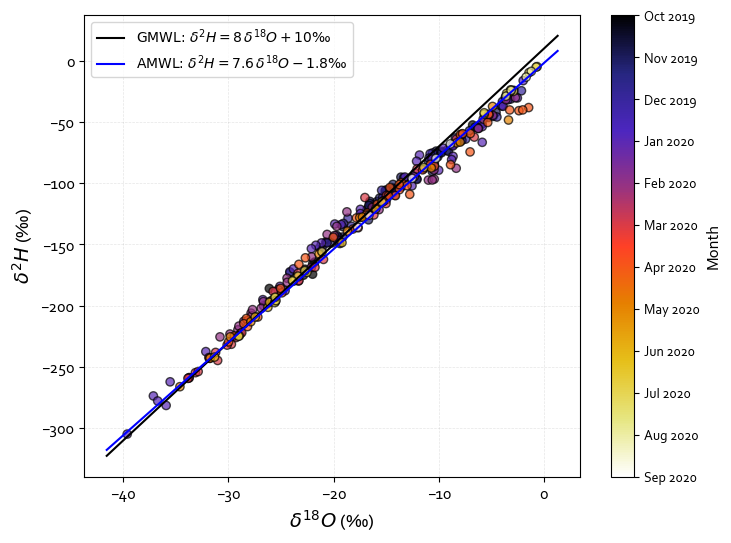

In [5]:
#####d18O vs dD#################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Define file path and sheet name
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\CiASOM.xlsx"
sheet_name = "All"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if required columns exist
required_columns = {"d18O", "dD", "Date"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Convert 'Date' column to datetime format and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Create a function to map month number to our custom index:
# For our period Oct 2019 to Sep 2020:
# Oct (10) -> 0, Nov (11) -> 1, Dec (12) -> 2,
# Jan (1)  -> 3,  Feb (2) -> 4, ..., Sep (9) -> 11.
def month_to_index(month):
    return month - 10 if month >= 10 else month + 2

# Apply the mapping to create a new column for color mapping
df['month_index'] = df['Month'].apply(month_to_index)

# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Create scatter plot using the month index and the 'CMRmap' colormap
sc = plt.scatter(df["d18O"], df["dD"], 
                 c=df["month_index"], cmap='CMRmap', 
                 alpha=0.7, edgecolors='k')

plt.xlabel("$\\delta^{18}O$ (‰)", fontname='Corbel', fontsize=14)
plt.ylabel("$\\delta^{2}H$ (‰)", fontname='Corbel', fontsize=14)

# Set font properties for tick labels
plt.xticks(fontname='Corbel', fontsize=12)
plt.yticks(fontname='Corbel', fontsize=12)

# Add grid with specific style
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# ----------------------------
# Add reference lines
# ----------------------------

# Determine x range for the reference lines based on current axis limits
x_vals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)

# Global Meteoric Water Line (GMWL): dD = 8*d18O + 10 (black)
y_gmwl = 8 * x_vals + 10
ax.plot(x_vals, y_gmwl, color='black', linestyle='-', linewidth=1.5,
        label="GMWL: $\\delta^{2}H = 8\\,\\delta^{18}O + 10‰$")

# Arctic Meteoric Water Line (AMWL): dD = 7.6*d18O - 1.8 (blue)
y_amwl = 7.6 * x_vals - 1.8
ax.plot(x_vals, y_amwl, color='blue', linestyle='-', linewidth=1.5,
        label="AMWL: $\\delta^{2}H = 7.6\\,\\delta^{18}O - 1.8‰$")

# Optionally, add a legend to identify the reference lines
ax.legend(fontsize=10)

# Create a ScalarMappable and colorbar that matches our custom ordering
norm = mcolors.Normalize(vmin=0, vmax=11)
mappable = cm.ScalarMappable(norm=norm, cmap='CMRmap')
mappable.set_array([])  # Associate the mappable with the colorbar

# Create colorbar with ticks at each integer from 0 to 11
cbar = plt.colorbar(mappable, ax=ax, ticks=np.arange(0, 12))
tick_labels = ["Oct 2019", "Nov 2019", "Dec 2019", 
               "Jan 2020", "Feb 2020", "Mar 2020", 
               "Apr 2020", "May 2020", "Jun 2020", 
               "Jul 2020", "Aug 2020", "Sep 2020"]
cbar.ax.set_yticklabels(tick_labels, fontname='Corbel', fontsize=10)
cbar.set_label('Month', fontsize=12, fontname='Corbel')

# Invert the y-axis of the colorbar so it runs from top (Oct 2019) to bottom (Sep 2020)
cbar.ax.invert_yaxis()

# Save the figure
save_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\Supp_Fig_dDvsd18O.jpg"
plt.savefig(save_path, dpi=600, format='jpeg', bbox_inches='tight')

plt.show()